In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
df=pd.read_csv('weight-height.csv')
X=df[['Height']].values
y_true=df[['Weight']].values

In [5]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

2021-12-21 10:54:54.157739: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /app/lib
2021-12-21 10:54:54.157850: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-21 10:54:54.157959: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (HP-Laptop-15-da0xxx-def03a20): /proc/driver/nvidia/version does not exist
2021-12-21 10:54:54.173928: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

/home/dhanyaharish/Documents/GitHub/deep-learning/pytorch/DL/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
model.fit(X,y_true, epochs=35, batch_size=110)

Epoch 1/35
91/91 [==============================] - 1s 2ms/step - loss: 3393.7317
Epoch 2/35
91/91 [==============================] - 0s 1ms/step - loss: 568.9009
Epoch 3/35
91/91 [==============================] - 0s 1ms/step - loss: 563.9255
Epoch 4/35
91/91 [==============================] - 0s 1ms/step - loss: 558.6802
Epoch 5/35
91/91 [==============================] - 0s 1ms/step - loss: 548.0847
Epoch 6/35
91/91 [==============================] - 0s 2ms/step - loss: 541.9175
Epoch 7/35
91/91 [==============================] - 0s 2ms/step - loss: 533.6649
Epoch 8/35
91/91 [==============================] - 0s 1ms/step - loss: 519.9485
Epoch 9/35
91/91 [==============================] - 0s 1ms/step - loss: 516.5127
Epoch 10/35
91/91 [==============================] - 0s 1ms/step - loss: 506.2779
Epoch 11/35
91/91 [==============================] - 0s 1ms/step - loss: 492.0564
Epoch 12/35
91/91 [==============================] - 0s 1ms/step - loss: 476.9670
Epoch 13/35
91/91 [=====

In [9]:
y_pred= model.predict(X)

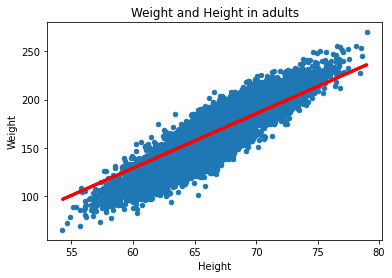

In [10]:
df.plot(kind='scatter',
       x='Height',
       y='Weight', title='Weight and Height in adults')
plt.plot(X, y_pred, color='red', linewidth=3)

In [11]:
w,b=model.get_weights()

In [12]:
w

array([[5.6525426]], dtype=float32)

In [13]:
b

array([-210.28432], dtype=float32)

# House price

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
USAhousing = pd.read_csv('USA_Housing.csv')
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [17]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [18]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [19]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam



In [23]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)



In [24]:
model = Sequential()



In [25]:
model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))



In [26]:
model.compile(optimizer=Adam(0.00001), loss='mse')



In [27]:
r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
3500/3500 [==============================] - 8s 2ms/step - loss: 1635953803264.0000 - val_loss: 1658077184000.0000
Epoch 2/100
3500/3500 [==============================] - 8s 2ms/step - loss: 1635052421120.0000 - val_loss: 1655852498944.0000
Epoch 3/100
3500/3500 [==============================] - 8s 2ms/step - loss: 1629861969920.0000 - val_loss: 1646398275584.0000
Epoch 4/100
3500/3500 [==============================] - 8s 2ms/step - loss: 1613236797440.0000 - val_loss: 1620127907840.0000
Epoch 5/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1573413060608.0000 - val_loss: 1562542342144.0000
Epoch 6/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1493395046400.0000 - val_loss: 1454344372224.0000
Epoch 7/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1353996828672.0000 - val_loss: 1277266886656.0000
Epoch 8/100
3500/3500 [==============================] - 7s 2ms/step - loss: 1144491343872.0000 - val_loss: 102

In [30]:
pd.DataFrame(r.history)

,loss,val_loss
0,1.635954e+12,1.658077e+12
1,1.635052e+12,1.655852e+12
2,1.629862e+12,1.646398e+12
3,1.613237e+12,1.620128e+12
4,1.573413e+12,1.562542e+12
...,...,...
95,1.747272e+10,1.616126e+10
96,1.719805e+10,1.603970e+10
97,1.711375e+10,1.584407e+10
98,1.675135e+10,1.568810e+10
